## Задание №2. Проверка статистических гипотез 

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

Веберите любые данные из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проверьте для них различные статистические гипотезы в соответствии со следующей схемой. Комментарии к каждому разделу обязательны. Возможно применения разных наборов данных для проверки разных гипотез.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/synchronous machine.csv", sep = ';')
data.head

<bound method NDFrame.head of       Iy    PF     e    dIf     If
0    3.0  0.66  0.34  0.383  1.563
1    3.0  0.68  0.32  0.372  1.552
2    3.0  0.70  0.30  0.360  1.540
3    3.0  0.72  0.28  0.338  1.518
4    3.0  0.74  0.26  0.317  1.497
..   ...   ...   ...    ...    ...
552  6.0  0.91  0.09  0.142  1.322
553  6.0  0.93  0.07  0.151  1.331
554  6.0  0.95  0.05  0.160  1.340
555  6.0  0.97  0.03  0.160  1.340
556  6.0  0.99  0.01  0.160  1.340

[557 rows x 5 columns]>

## Проверка гипотезы о нормальности распределения признаков (критерий Шапиро-Уилка, графический метод, метод на основе ассиметрии и эксцесса)

H0: X~N

H1: X≁N

Проверять "нормальность" распределения будем по критерию Шапиро-Уилка (*scipy.stats.shapiro*) на основе оптимальной линейной несмещённой оценке дисперсии к её обычной оценке.

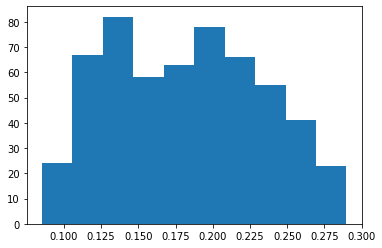

In [ ]:
plt.hist(np.log10(data['If']), bins=10)
plt.show()

In [ ]:
stats.shapiro(np.log10(data['If']))

ShapiroResult(statistic=0.9707548022270203, pvalue=4.266988096190971e-09)

На выходе получили значение p-value для нашей проверки, которое меньше критерия значимости α = 0.01, 0.05. Следовательно, гипотезу отклоняем (это подтверждается и неколокообразной гистограммой).

## Проверка гипотезы о независимости метрических признаков (корреляция Пирсона)

Корреляция Пирсона применяется для непрерывных случайных величин.

H0: X и Y независимы.

H1: X и Y зависимы.

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/data/consumers-price-index-september-2022-quarter-index-numbers.csv", sep = ';')
data1

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIQ.SE901,1914.06,13.167858,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
1,CPIQ.SE901,1914.09,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
2,CPIQ.SE901,1914.12,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
3,CPIQ.SE901,1915.03,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
4,CPIQ.SE901,1915.06,0.000000,FINAL,Index,CPI,CPI Level 1 Groups for New Zealand,Food
...,...,...,...,...,...,...,...,...
20242,CPIQ.SE9A,2021.09,1106.000000,FINAL,Index,CPI,CPI All Groups for New Zealand,All groups
20243,CPIQ.SE9A,2021.12,1122.000000,FINAL,Index,CPI,CPI All Groups for New Zealand,All groups
20244,CPIQ.SE9A,2022.03,1142.000000,FINAL,Index,CPI,CPI All Groups for New Zealand,All groups
20245,CPIQ.SE9A,2022.06,1161.000000,FINAL,Index,CPI,CPI All Groups for New Zealand,All groups


Возьмём из этой таблицы индекс цен для фруктов (data1_fruit) и овощей (data1_vegetables). Проверим независимость метрических признаков для этих данных.

In [ ]:
data1_fruit = data1[data1["Series_title_1"] == "Fruit"]
data1_fruit

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
528,CPIQ.SE901101,1999.06,602.178091,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
529,CPIQ.SE901101,1999.09,573.991031,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
530,CPIQ.SE901101,1999.12,549.007047,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
531,CPIQ.SE901101,2000.03,568.225496,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
532,CPIQ.SE901101,2000.06,559.256887,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
...,...,...,...,...,...,...,...,...
617,CPIQ.SE901101,2021.09,1014.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
618,CPIQ.SE901101,2021.12,1038.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
619,CPIQ.SE901101,2022.03,1167.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit
620,CPIQ.SE901101,2022.06,1096.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Fruit


In [ ]:
data1_vegetables = data1[data1["Series_title_1"] == "Vegetables"]
data1_vegetables

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
622,CPIQ.SE901102,1999.06,586.942039,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
623,CPIQ.SE901102,1999.09,536.309127,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
624,CPIQ.SE901102,1999.12,497.668221,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
625,CPIQ.SE901102,2000.03,554.297135,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
626,CPIQ.SE901102,2000.06,545.636242,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
...,...,...,...,...,...,...,...,...
711,CPIQ.SE901102,2021.09,1176.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
712,CPIQ.SE901102,2021.12,976.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
713,CPIQ.SE901102,2022.03,1047.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables
714,CPIQ.SE901102,2022.06,1078.000000,FINAL,Index,CPI,CPI Level 3 Classes for New Zealand,Vegetables


In [ ]:
stats.pearsonr(data1_fruit['Data_value'], data1_vegetables['Data_value'])

(0.8098454782923121, 4.9944391219656634e-23)

rho: 0.8098454782923121

p-value: 4.9944391219656634e-23

p-value < 0.01 (и 0.05 соответственно)  поэтому гипотезу H0 о независимости индексов цен на фрукты и овощи отвергаем.

## Проверка гипотезы о независимости ранговых признаков (корреляции Спирмена, Кендалла)

In [ ]:
stats.kendalltau(data1_fruit['Data_value'], data1_vegetables['Data_value'])

KendalltauResult(correlation=0.6207608351264183, pvalue=8.829144896643718e-19)

p-value < 0.01 (и 0.05 соответственно) поэтому гипотезу H0 о независимости индексов цен на фрукты и овощи отвергаем.

## Проверка гипотезы о независимости номинативных признаков ($\chi^2$)

H0: Две переменные независимы.

H1: Две переменные не являются независимыми.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/synchronous machine.csv", sep = ';')
data

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
...,...,...,...,...,...
552,6.0,0.91,0.09,0.142,1.322
553,6.0,0.93,0.07,0.151,1.331
554,6.0,0.95,0.05,0.160,1.340
555,6.0,0.97,0.03,0.160,1.340


In [ ]:
data[['dIf','If']]

,dIf,If
0,0.383,1.563
1,0.372,1.552
2,0.360,1.540
3,0.338,1.518
4,0.317,1.497
...,...,...
552,0.142,1.322
553,0.151,1.331
554,0.160,1.340
555,0.160,1.340


In [ ]:
stats.chi2_contingency(data[['dIf','If']])

(25.42299124911421, 1.0, 556, array([[0.36271501, 1.58328499],
        [0.35861443, 1.56538557],
        [0.35414107, 1.54585893],
        ...,
        [0.27958505, 1.22041495],
        [0.27958505, 1.22041495],
        [0.27958505, 1.22041495]]))

Статистика теста хи-квадрат: 25.42299124911421

р-значение: 1.0

Степени свободы: 556 (рассчитывается как #rows-1 * #columns-1)

Массив: последний массив отображает ожидаемые значения для каждой ячейки в таблице непредвиденных обстоятельств.

Поскольку p-значение (1.0) теста не меньше 0,05, мы не можем отвергнуть нулевую гипотезу H0.

## Проверка гипотезы о равенстве дисперсий (критерий Флингера-Килина, критерий Ливена, F-критерий)

H0: Две дисперсии равны.

H1: Две дисперсии не равны

In [ ]:
stats.fligner(data['dIf'],data['If'])

FlignerResult(statistic=0.00019616927395005096, pvalue=0.9888251589413608)

Поскольку p-значение (0.9888251589413608) теста не меньше 0,05, мы не можем отвергнуть нулевую гипотезу H0.

## Критерий согласия Стьюдента (одновыборочный)

H0: среднее значение dIf равно 0.2.

H1: отличается от 0.2.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/synchronous machine.csv", sep = ';')
data[['dIf','If']]

,dIf,If
0,0.383,1.563
1,0.372,1.552
2,0.360,1.540
3,0.338,1.518
4,0.317,1.497
...,...,...
552,0.142,1.322
553,0.151,1.331
554,0.160,1.340
555,0.160,1.340


In [ ]:
stats.ttest_1samp(data.dIf, 0.2)

Ttest_1sampResult(statistic=19.691852954915017, pvalue=6.908133026296102e-66)

pvalue меньше 0.01, поэтому отвергаем 𝐻0, среднее значение отличается от 0.2

## Проверка гипотезы о равенстве средних значений для независимых выборок (двухвыборочный критерий Стьюдента для независимых выборок)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/consumers-price-index-september-2022-quarter-index-numbers.csv", sep = ';')
data1_fruit = data1[data1["Series_title_1"] == "Fruit"]['Data_value']
data1_vegetables = data1[data1["Series_title_1"] == "Vegetables"]['Data_value']

In [ ]:
data1_fruit

528     602.178091
529     573.991031
530     549.007047
531     568.225496
532     559.256887
          ...     
617    1014.000000
618    1038.000000
619    1167.000000
620    1096.000000
621    1148.000000
Name: Data_value, Length: 94, dtype: float64

In [ ]:
data1_fruit.shape[0]

94

<a list of 94 Patch objects>

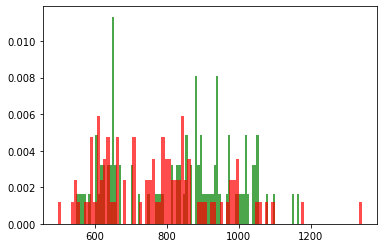

In [ ]:
plt.hist(data1_fruit, data1_fruit.shape[0], density = 1, color ='green', alpha = 0.7)[-1]
plt.hist(data1_vegetables, data1_vegetables.shape[0], density = 1, color ='red', alpha = 0.7)[-1]

In [ ]:
stats.ttest_ind(data1_fruit, data1_vegetables)

Ttest_indResult(statistic=2.515038797442644, pvalue=0.012749147627017815)

Здесь на уровне значимости H0 не отвергаем. Средние значения индекса цен для фруктов и овощей не различаются.

## Проверка гипотезы о равенстве средних значений для зависимых выборок (двухвыборочный критерий Стьюдента для зависимых выборок)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/synchronous machine.csv", sep = ';')
data

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
...,...,...,...,...,...
552,6.0,0.91,0.09,0.142,1.322
553,6.0,0.93,0.07,0.151,1.331
554,6.0,0.95,0.05,0.160,1.340
555,6.0,0.97,0.03,0.160,1.340


In [ ]:
stats.ttest_rel(data['Iy'], data['If'])

Ttest_relResult(statistic=83.87770350429217, pvalue=8.82822e-318)

p-value меньше критерия значимости, гипотеза H0 будет отвергнута.

## Проверка гипотезы о равенстве медиан для независимых выборок (ранговый критерий Манна-Уитни, перестановочный критерий)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/consumers-price-index-september-2022-quarter-index-numbers.csv", sep = ';')
data1_fruit = data1[data1["Series_title_1"] == "Fruit"]['Data_value']
data1_vegetables = data1[data1["Series_title_1"] == "Vegetables"]['Data_value']

In [ ]:
stats.mannwhitneyu(data1_fruit, data1_vegetables)

MannwhitneyuResult(statistic=5469.0, pvalue=0.004862703369348622)

p-value меньше критерия значимости 0.01, гипотеза H0 о равенстве медиан будет отвергнута.

## Проверка гипотезы о равенстве медиан для зависимых выборок (критерий знаковых рангов Уилкоксона, критерий знаков, перестановочный критерий)

H0: медианы равны.

H1: не равны.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/synchronous machine.csv", sep = ';')

In [ ]:
stats.wilcoxon(data['Iy'], data['If'])

WilcoxonResult(statistic=0.0, pvalue=6.244721305227723e-93)

p-value меньше критерия значимости, гипотеза H0 о равенстве медиан будет отвергнута.